# Análisis de datos y estadísticas

#### Importación de módulos a utilziar

In [47]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from collections import Counter

#### Apertura del archivo a procesar

In [48]:
csv = "informacion_partidas.csv"
path = os.path.join(os.getcwd(),'..','csv',csv)

try:
    df=pd.read_csv(path)

except FileNotFoundError:
    print(f"No se encuentra el dataset a procesar {csv}")

#### Top 10 de palabras que se encuentran primero de todas las partidas

In [49]:
partidas=df[df.Evento=='inicio_partida']
rondas_ok=df[df.Estado=='ok']

palabras = pd.merge(partidas[['Timestamp','Id']],rondas_ok[['Timestamp','Id','Respuesta']],on='Id')

# Me quedo con la primer rta correcta de la partida
palabras = palabras.drop_duplicates(subset='Id',keep='first',ignore_index=True) 

# Cálculo del tiempo transcurrido hasta dar la 1er rta correcta (Timestamp_x: tiempo de inicio de partida //Timestamp_y: tiempo al dar la rta)
palabras['Tiempo_transcurrido'] = palabras['Timestamp_y']-palabras['Timestamp_x'] 

# Ordeno por el tiempo calculado
palabras = palabras.sort_values(by='Tiempo_transcurrido') 

# Obtengo las 10 primeras palabras
top_10 = list(palabras['Respuesta'][:10]) 
#top_10=list(zip(palabras['Respuesta'][:10],palabras['Tiempo_transcurrido'][:10])) tambien el tiempo

print('Top 10 de palabras que se encuentran primero de todas las partidas: ',top_10)

Top 10 de palabras que se encuentran primero de todas las partidas:  ['Lago Belgrano', 'Rambo: Last Blood', 'A Taxi Driver', 'Alvin and the Chipmunks Meet Frankenstein', 'P!nk', 'Angelique', 'Ariana Grande', 'Drake', 'Paramore', 'Adele']


#### Módulo para gráficos de torta

In [50]:
def make_pie_chart(data: pd.Series, labels: list, title:str) -> plt.pie:
    """
    funcion 'make_pie_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de tortas con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        data (pd.Series): contiene una Serie a la que se le aplicó el criterio .groupby.size()
        labels (list): es una lista que contiene las claves del parámetro 'data'
        title (str): es una cadena que será el título del gráfico
    """
    plt.pie(data, autopct='%1.1f%%', shadow=True)
    plt.legend(labels)
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#### Módulo para gráficos de barras

In [51]:
def make_bar_chart(valores_x:list,valores_y:list, title:str,y_label:str,x_label:str):
    """
    funcion 'make_bar_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de barras con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        valores_x(list): son los valores que van en el eje x del gráfico
        valores_y(list): son los valores que van en el eje y del gráfico
        title (str): es una cadena que será el título del gráfico
        y_label(str): es la etiqueta de los valores del eje y 
        x_label(str): es la etiqueta de los valores del eje x
        range(int): valor maximo para el eje y
    """
    
    def agregar_valores(valores:list):
        """
        Def:
            Le agrega al gráfico los valores de las barras
        Args:
            valores(list): lista de los valores
        """
        for i in range(len(valores)):
            #plt.text recibe x,y,s. En la cordenada (x,y) agrega el valor s
            plt.text(i,valores[i],valores[i],ha='center')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    agregar_valores(valores_y)
    plt.bar(valores_x,valores_y)

#### Gráfico que muestre el porcentaje de partidas por estado.

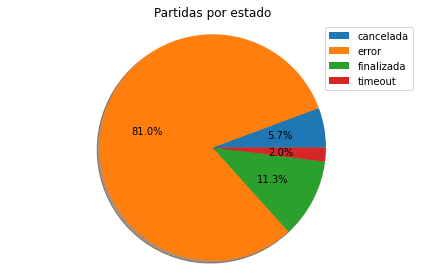

In [52]:
# uso de matplotlib e informacion_partidas.csv//columna[2] "Estado"

#ok, finalizada, error, -, timeout, cancelada, partidas sin evento fin

estado = df[(df["Estado"] != "ok") & (df["Estado"] != "-")]
estado = estado.groupby(["Estado"]).size()
etiquetas = [x for x in estado.keys()]
make_pie_chart(estado, etiquetas, "Partidas por estado")


#### Gráfico que muestre el porcentaje de partidas finalizadas según género

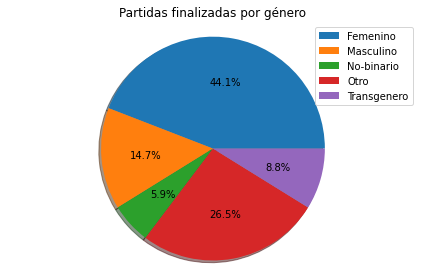

In [53]:
# uso de matplotlib e informacion_partidas.csv//columna[8] "Genero"
#mismo procesamiento que gráfico anterior, cambia columna

genero = df[df["Estado"] == "finalizada"]
genero = genero.groupby(["Genero"]).size()
etiquetas = [x for x in genero.keys()]
make_pie_chart(genero, etiquetas, "Partidas finalizadas por género")

#### Gráfico que muestre el porcentaje de partidas finalizadas según dataset.

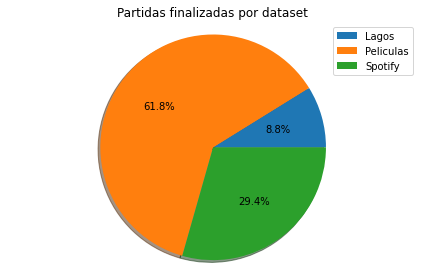

In [54]:
# uso de matplotlib e informacion_partidas.csv//columna[9] "Dataset"

dataset = df[df["Estado"] == "finalizada"]
dataset = dataset.groupby(["Dataset"]).size()
etiquetas = [x for x in dataset.keys()]
make_pie_chart(dataset, etiquetas, "Partidas finalizadas por dataset")

#### Gráfico que muestre el procentaje de partidas finalizadas según nivel

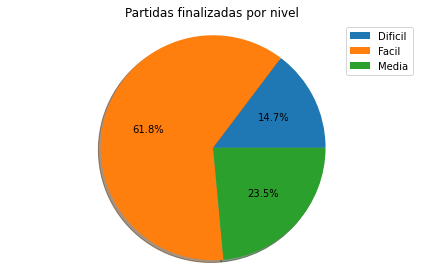

In [55]:
# uso de matplotlib e informacion_partidas.csv//columna[7] "Nivel"
#mismo procesamiento que gráfico anterior, cambia columna

dificultad = df[df["Estado"] == "finalizada"]
dificultad = dificultad.groupby(["Nivel"]).size()
etiquetas = [x for x in dificultad.keys()]
make_pie_chart (dificultad, etiquetas, "Partidas finalizadas por nivel")

#### Duración total de la partida

In [45]:
def duracion_partida(partida):
    return df[df.Id==partida].iloc[-1].Timestamp - df[df.Id==partida].iloc[0].Timestamp

def mensaje_partida(id_partida,duracion):
    return f"La partida con ID '{id_partida}' ha durado {duracion} segundos"

partidas = df.Id.unique()

duraciones_por_partida = list(map(lambda id_partida: mensaje_partida(id_partida,duracion_partida(id_partida)),partidas))

duraciones_por_partida

["La partida con ID '58iok06o-epjd-78m2-6ljlilkid13tcwat' ha durado 5 segundos",
 "La partida con ID 'gznnofpn-ysc5-d605-zkpyjj730c2744h2' ha durado 5 segundos",
 "La partida con ID 'lz5gcmja-4ew6-9wem-fi19thuj5k8oyil6' ha durado 5 segundos",
 "La partida con ID 'd76grgf0-4lvi-nv4a-ccy62p3ovh3bkmkt' ha durado 7 segundos",
 "La partida con ID '8vdbkck1-zs8s-clga-bb1ocgquyvicvc5z' ha durado 12 segundos",
 "La partida con ID 'oashq5c6-l9k0-6ewl-fq4nppfdeic96jlb' ha durado 17 segundos",
 "La partida con ID 'ytvymo2z-2j33-iru5-li0plmyo3fz0ymx7' ha durado 27 segundos",
 "La partida con ID 'gyzo6cf0-qndk-pzms-n926vl9kja5ba00f' ha durado 55 segundos",
 "La partida con ID 'vr6yu9bj-6nlm-imgq-fbrl93f3aqpey2zv' ha durado 20 segundos",
 "La partida con ID 'revrzcpz-o4t5-9amg-q1yv1byrb94kg0mf' ha durado 21 segundos",
 "La partida con ID '24g9weug-g3lu-s0d3-s6cw4jbigb86vhfc' ha durado 10 segundos",
 "La partida con ID '9uruv4uw-73wb-xmya-96apqlcu3benuv6i' ha durado 6 segundos",
 "La partida con ID '

#### Tiempo de la respuesta exitosa más rápida

In [56]:
def tiempo_de_respuesta(indice):
    return df.loc[indice].Timestamp - df.loc[indice-1].Timestamp

indices_ok = df[df.Estado == 'ok'].index

tiempo_respuestas_ok = list(map(lambda x: tiempo_de_respuesta(x),indices_ok))
print(f"Tiempo de respuesta más rápida: {min(tiempo_respuestas_ok)} segundos")

Tiempo de respuesta más rápida: 0 segundos


#### Promedio de tiempo de respuesta para respuestas exitosas

In [57]:
from functools import reduce

promedio = reduce(lambda a, b: a + b, tiempo_respuestas_ok) / len(tiempo_respuestas_ok)

print (f"El tiempo promedio de respuesta exitosa es: {promedio:.2f}s") 

El tiempo promedio de respuesta exitosa es: 7.87s


#### Promedio de tiempo de partida general

In [ ]:
duraciones_partida = list(map(lambda id_partida: duracion_partida(id_partida),partidas))

promedio_general = reduce(lambda a, b: a + b, duraciones_partida) / len(duraciones_partida)

print ("El promedio de tiempo de partida general es de:","{:.2f}".format(promedio_general) ,"segundos")

#### DataFrame con datos de cada usuario utilizado para los incisos:
- Porcentaje de aciertos por usuarie.
- Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).
- Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.

In [60]:
total_rtas=df[(df["Estado"] == "ok")|(df["Estado"] == "error")|(df["Estado"] == "timeout")]
rtas_por_usuario=total_rtas.groupby(["Usuarie"]).size()

aciertos= df[df["Estado"] == "ok"]
aciertos_usuarios=aciertos.groupby(["Usuarie"]).size()

sin_respuesta = df[df["Estado"] == "timeout"]
sin_respuesta=sin_respuesta.groupby(["Usuarie"]).size()

errores = df[df["Estado"] == "error"]
errores = errores.groupby(["Usuarie"]).size()

usuarios=list(rtas_por_usuario.keys())

data ={'Usuaries':usuarios,
        'Aciertos':aciertos_usuarios,
        'Errores':errores,
        'Timeout':sin_respuesta,
        'Rtas Totales':rtas_por_usuario
        }

info_usuarios=pd.DataFrame(data).reset_index(drop=True).fillna(0)

# Covierto aquellas columnas con valores en float a int
cols = info_usuarios.columns[info_usuarios.dtypes.eq('float')]
info_usuarios[cols]=info_usuarios[cols].astype(int)

info_usuarios

,Usuaries,Aciertos,Errores,Timeout,Rtas Totales
0,Coni,3,17,0,20
1,ELizabeth,12,18,0,30
2,Emi,6,14,0,20
3,Fran,1,9,1,11
4,Juan,11,31,0,42
5,Juli,15,52,0,67
6,Luqita,19,56,2,77
7,Marian,5,5,0,10
8,Nati,11,9,0,20
9,Tato,7,13,0,20


#### Porcentaje de aciertos por usuarie

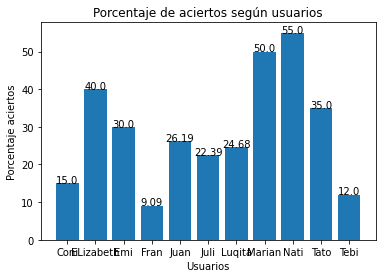

In [61]:
porcentajes=list(round(((info_usuarios['Aciertos']/info_usuarios['Rtas Totales'])*100),2))

make_bar_chart(list(info_usuarios['Usuaries']),porcentajes,'Porcentaje de aciertos según usuarios','Porcentaje aciertos','Usuarios')

#### Cantidad de tarjetas para las que el usuarie no dio respuesta

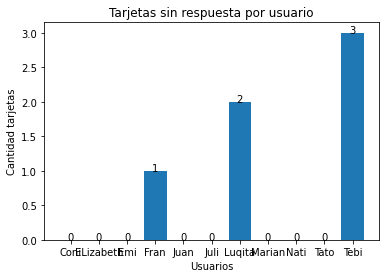

In [62]:
make_bar_chart(list(info_usuarios.Usuaries),list(info_usuarios.Timeout),'Tarjetas sin respuesta por usuario','Cantidad tarjetas','Usuarios')

#### Cantidad de tarjetas en las que el usuarie dio una respuesta errónea

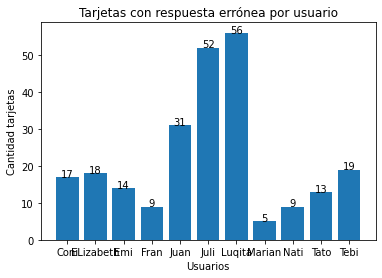

In [63]:
make_bar_chart(list(info_usuarios.Usuaries),list(info_usuarios.Errores),'Tarjetas con respuesta errónea por usuario','Cantidad tarjetas','Usuarios')

### Opcional

#### Gráfico que muestre el porcentaje de partidas que se juegan para cada dia de la semana

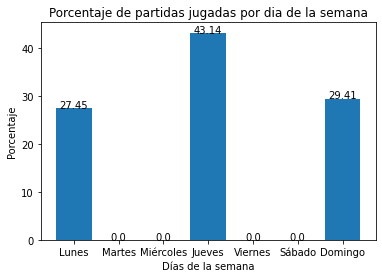

In [64]:
dias_semana=pd.Series(
    {
    0:'Lunes',
    1:'Martes',
    2:'Miércoles',
    3:'Jueves',
    4:'Viernes',
    5:'Sábado',
    6:'Domingo',
    }
)

partidas=df[df.Evento=='inicio_partida']['Timestamp']
cant_por_dia=pd.Series(Counter([datetime.fromtimestamp(x).weekday()for x in partidas]))

partidas_por_dia=pd.concat([dias_semana,cant_por_dia],axis=1,keys=['Días','Partidas Jugadas']).fillna(0)
partidas_por_dia['Partidas Jugadas'] = partidas_por_dia['Partidas Jugadas'].astype(int)

porcentajes=list(round(((partidas_por_dia['Partidas Jugadas']/len(partidas))*100),2))
make_bar_chart(list(partidas_por_dia['Días']),porcentajes,'Porcentaje de partidas jugadas por dia de la semana','Porcentaje','Días de la semana')

#### Promedio de tiempo de partidas finalizadas por nivel

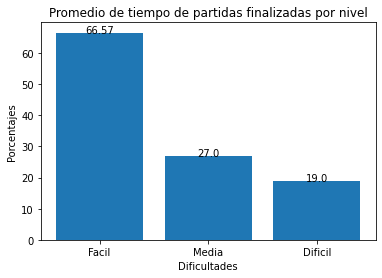

In [65]:
eventos = ["inicio_partida", "fin"]
duraciones = {"Facil": {}, "Media": {}, "Dificil": {}}
partidas = df[df["Evento"].isin(eventos)]
partidas = partidas.drop(partidas.columns[[3,4,5,6,8,9]], axis = 1)
for i in range(len(partidas)):
    if (partidas.iloc[i].Evento == "inicio_partida") and (partidas.iloc[i+1].Evento == "fin"):
        duracion = partidas.iloc[i+1].Timestamp - partidas.iloc[i].Timestamp 
        dict_dificultad = duraciones[partidas.iloc[i].Nivel]
        dict_dificultad[partidas.iloc[i].Id] = duracion

promedio_facil = round(sum(duraciones["Facil"].values())/len(duraciones["Facil"]),2)
promedio_media = round(sum(duraciones["Media"].values())/len(duraciones["Media"]),2)
promedio_dificil = round(sum(duraciones["Dificil"].values())/len(duraciones["Dificil"]),2)
promedios = [promedio_facil, promedio_media, promedio_dificil]
make_bar_chart(["Facil", "Media", "Dificil"], promedios, "Promedio de tiempo de partidas finalizadas por nivel", "Porcentajes", "Dificultades")

#### Porcentaje de palabras encontradas en las partidas "timeout"